<h2 style="text-align: center;">CENG222</h2>
<h3 style="text-align: center;">Probability and Statistics</h3>
<h3 style="text-align: center;">Term Project for 2022-2023 Spring</h3>

In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
from collections import Counter
np.set_printoptions(precision=3, suppress=True)

<span style="color:red">**1**</span>. Implement a function (**pmf_a**) to compute the PMF of A.

In [2]:
def pmf_a(a):
    return (0.5)**(a+1)

    

In [4]:
def generate_a():
    u = np.random.random()
    p = 0.5  
    a = np.ceil(np.log(u) / np.log(1 - p))
    return int(a - 1)  
    

<span style="color:red">**5**</span>. Implement a function (**pdf_b**) to compute the PDF of B.

In [6]:
def pdf_b(b):
    
    x = 0.5
    y = 2.5
    z = 5.5

    if x <= b <= y:
        return -(0.096)*(b**3)+(0.432)*(b**2)-0.352*b+0.08
    elif y <= b <= z:
        return (-2*b+11)/15
    else:
        return 0


<span style="color:red">**6**</span>. Implement a function (**generate_b**) to generate B <u><b>using the rejection method.</b></u>

In [7]:
b_values = np.linspace(0.5, 5.5, 10000)  
max_pdf_b = max(pdf_b(b) for b in b_values)

def generate_b():
    while True:
        b_candidate = 0.5 + np.random.random() * (5.5 - 0.5)  
        u = np.random.random() * max_pdf_b
        if u <= pdf_b(b_candidate):
            return b_candidate


<span style="color:red">**7**</span>. Implement a function (**calculate_c**) to calculate C using generated A and B values. You can
enumerate C if you like.

In [8]:
def calculate_c(a, b):
    if a > 2 and 3 <= b <= 5.5:
        return 'risky' 
    elif a <= 2 and 0.5 <= b < 3:
        return 'risky'  
    elif a > 2 and 0.5 <= b < 3:
        return 'not risky'  
    elif a <= 2 and 3 <= b <= 5.5:
        return 'very risky' 


<span style="color:red">**8**</span>. Implement a function (**pdf_d**) to compute the PDF of D.

In [9]:
def pdf_d(d, mu, sigma):
    d = np.float64(d)  
    pdf = (1 / (sigma * sp.sqrt(2 * sp.pi))) * sp.exp(-0.5*((d - mu) / (sigma))**2)
    return pdf

    

<span style="color:red">**9**</span>. Implement a function (**generate_d**) to generate D for the calculated C values <u><b>using NumPy’s
    normal distribution function: <span style="color:green">numpy.random.normal.</span></b></u>

In [10]:
def generate_d(c):
    if c == 'very risky':
        mu = 240
        sigma = 50
    elif c == 'risky':
        mu = 200
        sigma = 70
    elif c == 'not risky':
        mu = 160
        sigma = 30
    else:
        mu = 0
        sigma = 0

    d = np.random.normal(mu, sigma)
    return d  

    

<span style="color:red">**11**</span>. Implement a function (**pdf_e**) to compute the PDF of E.

In [11]:
def pdf_e(e, i, j):
    try:
        e = float(e)
    except ValueError:
        print(f"Cannot converte {e} to float")
    if (i + np.sqrt(j)) <= e <= (i + np.sqrt(j + 1)):
        pdf = 2 * (e - i)
    else:
        pdf = 0
    return pdf



<span style="color:red">**12**</span>. Implement a function (**generate_e**) to generate E <u><b>using the inverse transformation method</b></u> and
    the calculated C values.

In [12]:
def generate_e(c):
    if c == 'very risky':
        i, j = 0.9, 0.2
    elif c == 'risky':
        i, j = 0.5, 0.5
    elif c == 'not risky':
        i, j = 0.1, 0.8
    else:
        i, j = 0.0,0.0  
    
    U = np.random.random()
    e = i + np.sqrt(U + j)
    if i+np.sqrt(j) <= e <= i+np.sqrt(j+1):
        return e
    else:
        return 0


<span style="color:red">**14**</span>. Based on step 13, implement a function (**pdf_h**) to compute the PDF of H.

In [13]:
def pdf_h(h, k, l):
    h = float(h)
    if 0 <= h < 1:
        return k
    elif 1 <= h <= 2:
        return l
    else:
        return 0

     

<span style="color:red">**15**</span>. Implement a function (**generate_h**) to generate H <u><b>using the rejection method.</b></u>

In [14]:
def generate_h(c):
    k_values = {'very risky': 0.1, 'risky': 0.4, 'not risky': 0.7}
    l_values = {'very risky': 0.9, 'risky': 0.6, 'not risky': 0.3}

    k = k_values.get(c, 0.5)  
    l = l_values.get(c, 0.5)  

    U = np.random.random()  

    if U < k:  
        h = U / k
    else: 
        h = 1 + (U - k) / l
    
    return h

    

<span style="color:red">**16**</span>. Implement a function (**generate_population**) that takes the number of patients (W) as input and generates and returns a population of size (Wx6) using the functions implemented above.
<br>
<br>
In other words, for W many patients, it should first generate A and B values and then calculate the C values for them. Then based on the patients’ computed C values, it should generate D, E, and H values. Finally, it should also plot the following:
* a. In the same figure, plot the population histogram for A and the pmf of A.
* b. In the same figure, plot the population histogram for B and the pdf of B.
* c. Plot the population histogram for C and print the pmf of C estimated using the
generated population.
* d. In the same figure, plot the population histogram for D and the joint pdf of D with each
possible value of C.
* e. In the same figure, plot the population histogram for E and the joint pdf of D with each
possible value of C.

In [15]:
def generate_population(W):
    sample_size = W
    

    fig, axs = plt.subplots(3, 2, figsize=(15, 15))

    # Plot A
    samples = [generate_a() for _ in range(sample_size)]
    axs[0, 0].hist(samples, density=True, bins=range(0, 10), alpha=0.7, label="Histogram")
    a_values = range(10)
    pmf_values = [pmf_a(a) for a in a_values]
    axs[0, 0].plot(a_values, pmf_values, 'o-', label="PMF")
    axs[0, 0].set_title('PMF and Histogram for A')
    axs[0, 0].set_xlabel('a')
    axs[0, 0].set_ylabel('Probability')
    axs[0, 0].legend()

    # Plot B
    samples = np.array([generate_b() for _ in range(W)])
    axs[0, 1].hist(samples, bins=50, density=True, alpha=0.6, color='g')
    x = np.linspace(0.5, 5.5, 100)
    y = [pdf_b(i) for i in x]
    axs[0, 1].plot(x, y, 'r')
    axs[0, 1].set_title('Histogram of samples for B and its PDF')
    axs[0, 1].set_xlabel('Value')
    axs[0, 1].set_ylabel('Frequency/Probability Density')

    # Plot C
   
    a_values = [generate_a() for _ in range(sample_size)]
    b_values = [generate_b() for _ in range(sample_size)]
    c_values = [calculate_c(a, b) for a, b in zip(a_values, b_values)]

    category_map = {'not risky': 0, 'risky': 1, 'very risky': 2}
    c_values_int = [category_map[category] if category is not None else -1 for category in c_values]

    pmf = Counter(c_values_int)
    for k in pmf:
        pmf[k] /= sample_size
    axs[1, 0].hist(c_values_int, bins=len(pmf), density=True, alpha=0.6)

    #Print PMF
    patient_cat, num_category = np.unique(c_values, return_counts=True)
    pmf_c = num_category / len(c_values)
    for i in range(len(num_category)):
        print(f"P({patient_cat[i]}) = {pmf_c[i]}")

    axs[1, 0].set_xticks(list(category_map.values()))
    axs[1, 0].set_xticklabels(list(category_map.keys()))

    axs[1, 0].set_title('Population Histogram for C')
    axs[1, 0].set_xlabel('Category')
    axs[1, 0].set_ylabel('Probability')

    # Plot D
    categories = ['very risky', 'risky', 'not risky']
    colors = ['r', 'g', 'b']
    for i, category in enumerate(categories):
        samples = [generate_d(category) for _ in range(W)]
        axs[1, 1].hist(samples, bins=50, density=True, alpha=0.6, color=colors[i], label=category)
        mu = np.mean(samples)
        sigma = np.std(samples)
        d_values = np.linspace(min(samples), max(samples), 100)
        pdf_values = [pdf_d(d, mu, sigma) for d in d_values]
        axs[1, 1].plot(d_values, pdf_values, color=colors[i])
    axs[1, 1].legend()
    axs[1, 1].set_title('Histograms and PDFs for D')
    axs[1, 1].set_xlabel('Value')
    axs[1, 1].set_ylabel('Frequency/Probability Density')

    # Plot E
    for index, category in enumerate(categories):
        samples = [generate_e(category) for _ in range(W)]
        axs[2, 0].hist(samples, bins=50, density=True, alpha=0.6, color=colors[index], label=category)
        if category == 'very risky':
            i, j = 0.9, 0.2
        elif category == 'risky':
            i, j = 0.5, 0.5
        elif category == 'not risky':
            i, j = 0.1, 0.8
        e_values = np.linspace(min(samples), max(samples), 100)
        pdf_values = [pdf_e(e, i, j) for e in e_values]
        axs[2, 0].plot(e_values, pdf_values, color=colors[index])
    axs[2, 0].legend()
    axs[2, 0].set_title('Histograms and PDFs for E')
    axs[2, 0].set_xlabel('Value')
    axs[2, 0].set_ylabel('Frequency/Probability Density')

    fig.delaxes(axs[2,1])

    plt.tight_layout()
    plt.show()

    

<span style="color:red">**17**</span>. Generate a population of 1000 patients. It should be a 2D array of shape 1000x6 where the random variables appear in the order of A, B, C, D, E, and H.

P(not risky) = 0.074
P(risky) = 0.549
P(very risky) = 0.377


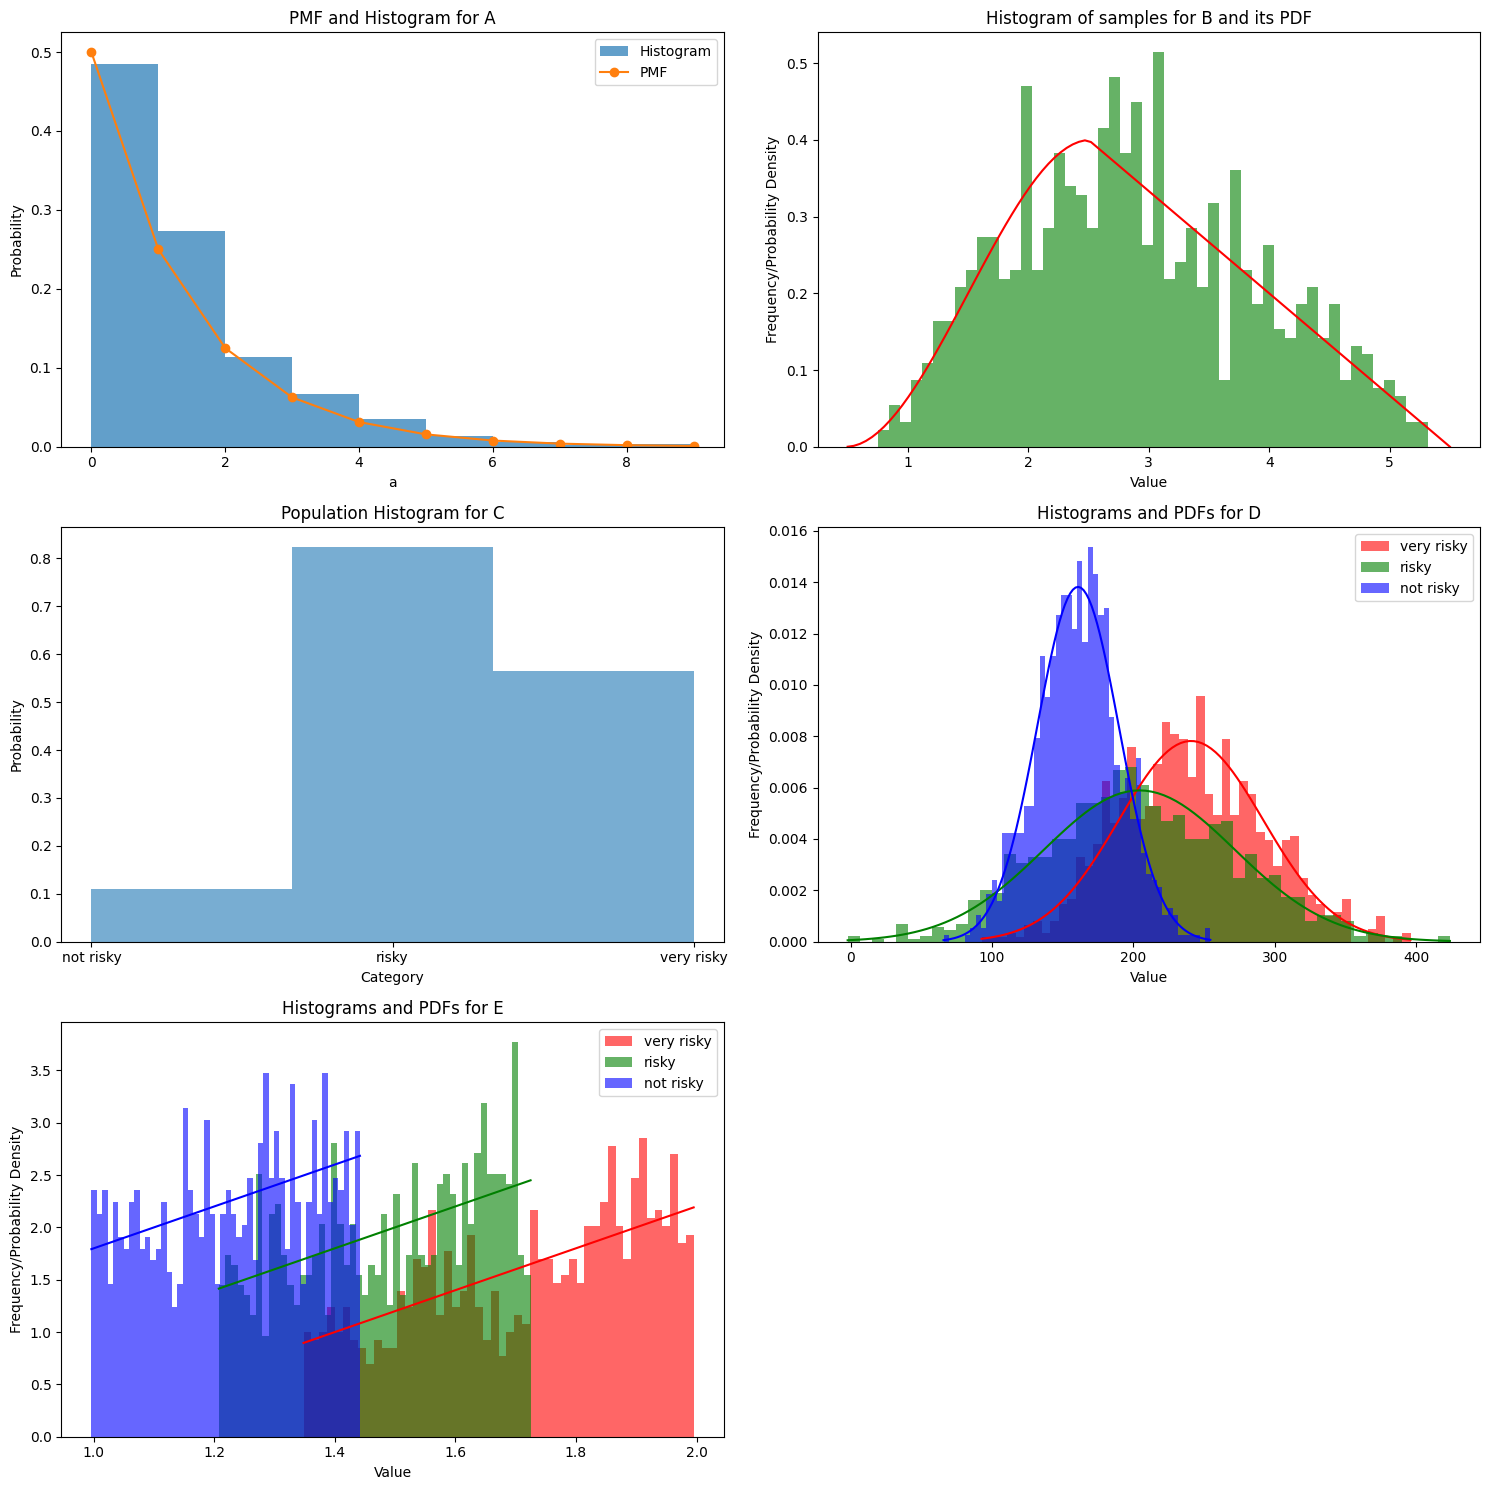

In [16]:
population = generate_population(1000)

<span style="color:red">**18**</span>. Similar to step 17, generate a population of 1000000 patients. **This will be your hypothetical population to be analyzed in the next tasks.** Compute and print the random variable means and variances for this population using <u><b><span style="color:green">numpy.mean</span></b></u> and <u><b><span style="color:green">numpy.var</span></b></u>

P(not risky) = 0.072786
P(risky) = 0.562458
P(very risky) = 0.364756


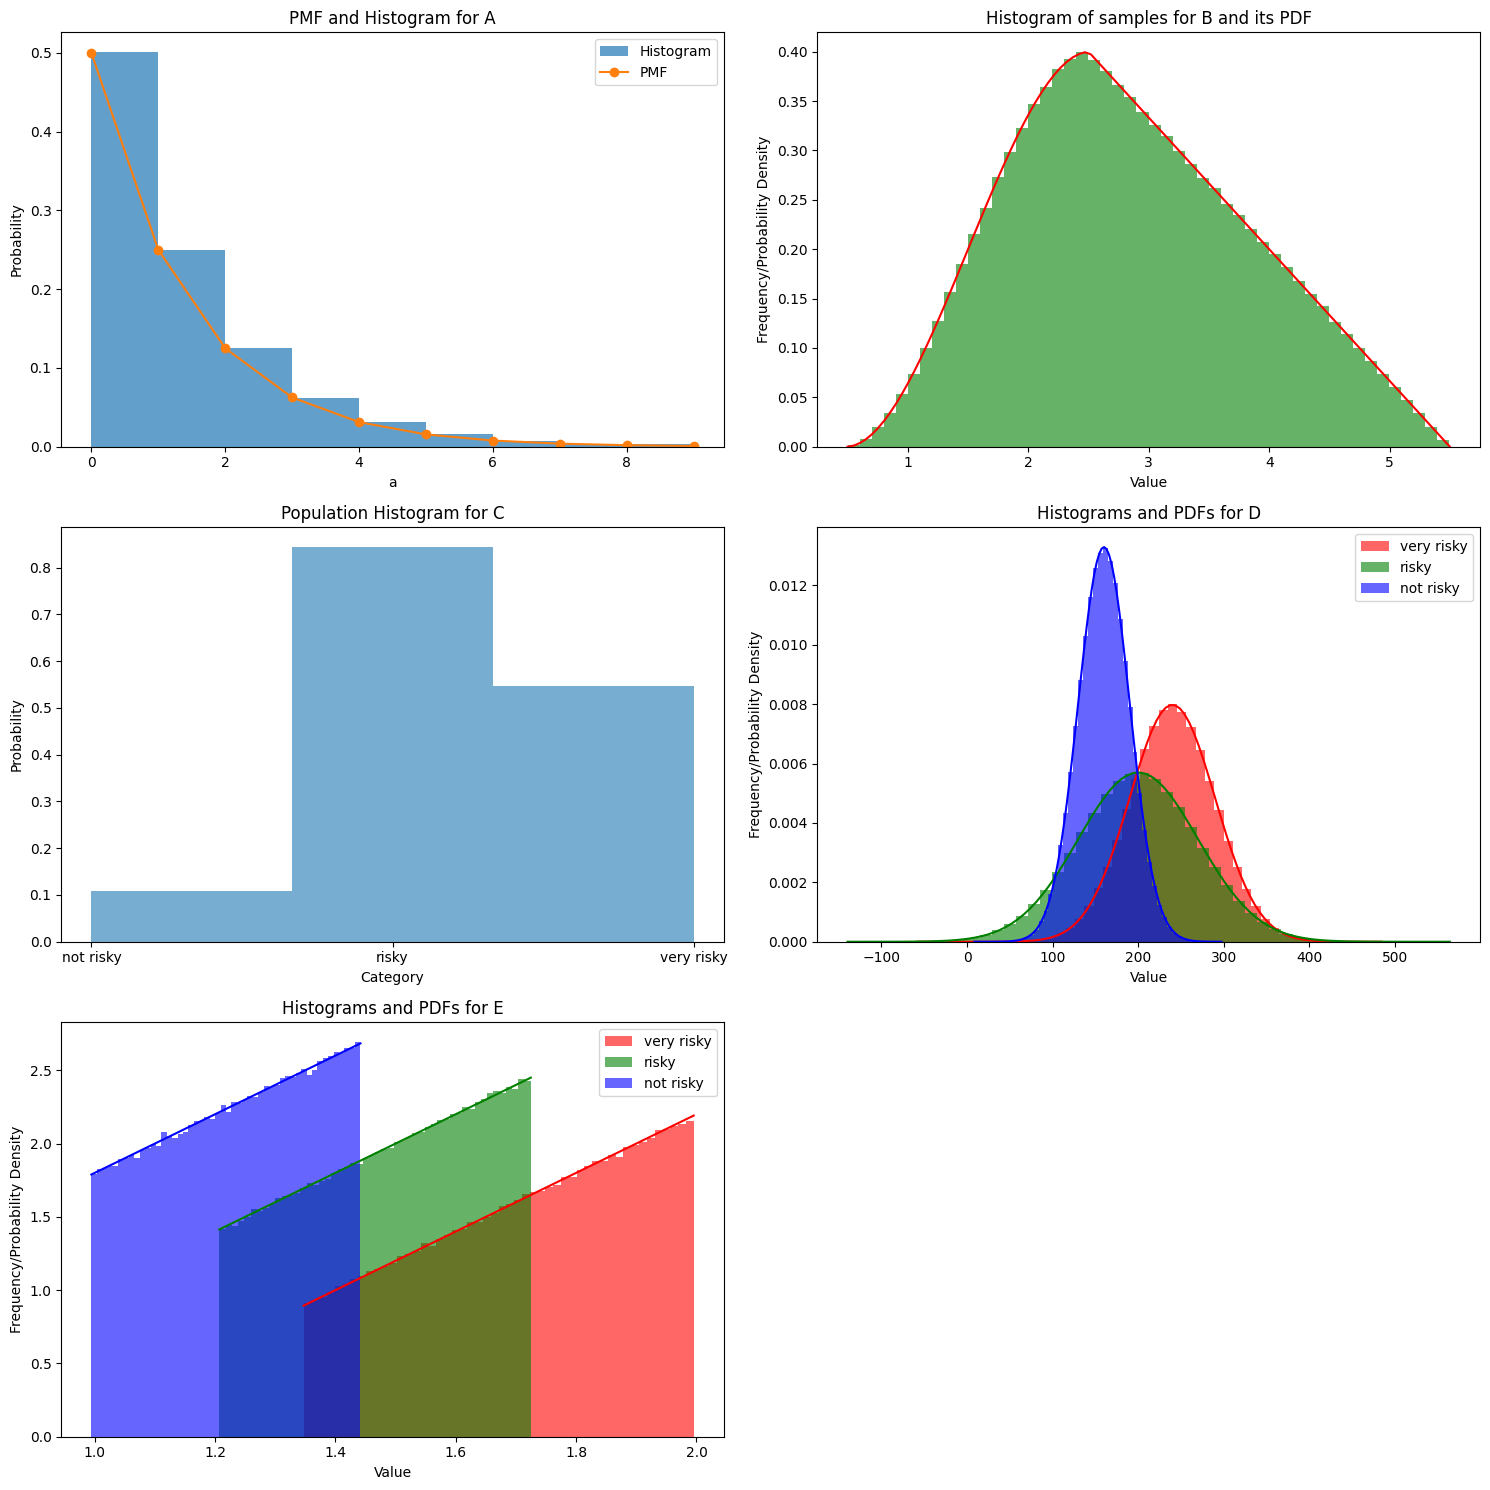

A:
Mean: 0.999836
Variance: 1.999909973104001
B:
Mean: 2.859668009045759
Variance: 0.9869433486002933
C:
Mean: 1.29173
Variance: 0.3524216071
D:
Category: very risky
Mean: 240.07077427757403
Variance: 2500.6773828305145
Category: risky
Mean: 200.11970728504147
Variance: 4894.408930388604
Category: not risky
Mean: 160.01454968764085
Variance: 898.64825956716
E:
Category: very risky
Mean: 1.7168403311324103
Variance: 0.0329462991498208
Category: risky
Mean: 1.4890812175445867
Variance: 0.021799677588268826
Category: not risky
Mean: 1.2329598585964845
Variance: 0.016427050552802854


In [17]:
population_1m= generate_population(1000000)

# Generate a population of 1,000,000 samples
population_size = 1000000

# Generate A values
a_values = [generate_a() for _ in range(population_size)]
print("A:")
print("Mean:", np.mean(a_values))
print("Variance:", np.var(a_values))

# Generate B values
b_values = [generate_b() for _ in range(population_size)]
print("B:")
print("Mean:", np.mean(b_values))
print("Variance:", np.var(b_values))

# Generate C values
c_values = [calculate_c(a, b) for a, b in zip(a_values, b_values)]
category_map = {'not risky': 0, 'risky': 1, 'very risky': 2}
c_values_int = [category_map[category] if category is not None else -1 for category in c_values]
print("C:")
print("Mean:", np.mean(c_values_int))
print("Variance:", np.var(c_values_int))

# Generate D values for each category
print("D:")
for category in ['very risky', 'risky', 'not risky']:
    d_values = [generate_d(category) for _ in range(population_size)]
    print("Category:", category)
    print("Mean:", np.mean(d_values))
    print("Variance:", np.var(d_values))

# Generate E values for each category
print("E:")
for category in ['very risky', 'risky', 'not risky']:
    e_values = [generate_e(category) for _ in range(population_size)]
    print("Category:", category)
    print("Mean:", np.mean(e_values))
    print("Variance:", np.var(e_values))


### TASK 2: Sampling and Descriptive Statistics
<br>
<br>
Your second task is to take samples from your population and compute and visualize some descriptive statistics for each sample. If you fail to accomplish Task 1, you can load the <u><b>population.txt</b></u> file provided along with this assignment as a NumPy array using <u><b><span style="color:green">numpy.loadtxt.</span></b></u>
<br>
<br>
Firstly, you have to implement the sampler function to take samples from the population. You are <u><b>not allowed</b></u> to use any number generator function other than <u><b><span style="color:green">numpy.random.random</span></b></u>. Next, you must implement estimators for the population mean and variance. You are <u><b>not allowed</b></u> to use <u><b><span style="color:green">numpy.mean</span></b></u>, <u><b><span style="color:green">numpy.std</span></b></u>, or <u><b><span style="color:green">numpy.var</span></b></u> functions. To have a better insight into the performances of these estimators, you should take multiple samples to estimate from and plot the histograms of the estimations with indicators for the actual population mean and variance.
<br>
<br>
Here are the detailed steps:

<span style="color:red">**1**</span>. Implement a function (**random_sample**) that takes a population and a sample size (n) as inputs and returns a random sample of that population with dimensions of nx6 where the random variables appear in the same order as the population.
<br>
<br>
<u>For the next steps, a column of that population sample (nx1) will be referred to as a <b>sample.</b><u>
The first column is a sample of A; the second column is a sample of B, and so on.

In [18]:
def random_sample(population, sample_size):
    population_size = len(population)
    sample = []
    
    for _ in range(sample_size):
        index = int(np.random.random() * population_size)  
        sample.append(population[index])
        
    return np.array(sample)


    

<span style="color:red">**2**</span>. Implement a function (**estimate_mean**) that estimates the population mean of a variable with
its sample mean. It should take a sample and return an estimation for the mean.

In [19]:
def estimate_mean(sample):
    n = len(sample)
    total = sum(sample)
    mean_estimate = total / n
    return mean_estimate

    

<span style="color:red">**3**</span>. Implement a function (**estimate_variance_1**) that estimates the population variance of a
variable using its sample with the formula below. It should take a sample and return an estimation for the variance.
<br>
<br>
$$s^2 = ∑_{i=1}^N (X_i - \bar{X})^2 / (n-1)$$

In [20]:
def estimate_variance_1(sample):
    mean_estimate = estimate_mean(sample)
    squared_diffs = [(x - mean_estimate) ** 2 for x in sample]
    sum_squared_diffs = sum(squared_diffs)
    n = len(sample)
    variance_estimate = sum_squared_diffs / (n - 1)
    return variance_estimate

    

<span style="color:red">**4**</span>. Implement a function (**estimate_variance_2**) that estimates the population variance for a variable using its sample with the formula below. It should take a sample and return an estimation for the variance.
<br>
<br>
$$s^2 = ∑_{i=1}^N (X_i - \bar{X})^2 / n$$

In [21]:
def estimate_variance_2(sample):
    mean_estimate = estimate_mean(sample)
    squared_diffs = [(x - mean_estimate) ** 2 for x in sample]
    sum_squared_diffs = sum(squared_diffs)
    n = len(sample)
    variance_estimate = sum_squared_diffs / n
    return variance_estimate

    

<span style="color:red">**5**</span>. Implement a function (**descriptive_stats**) that takes a population, sample size (n), number of sampling (m), and variable index as input. It returns lists of estimated means and variances of type 1 and type 2 using the previously implemented functions. In other words, it should take a sample of size n from the population m times and create descriptive statistics lists of length m for the variable at the given index.

In [22]:
def descriptive_stats(population, sample_size, num_sampling, var):
    est_means = []
    est_variances_1 = []
    est_variances_2 = []
    for _ in range(num_sampling):
        sample = random_sample(population, sample_size)
        est_means.append(estimate_mean(sample))
        est_variances_1.append(estimate_variance_1(sample))
        est_variances_2.append(estimate_variance_2(sample))
        
    return est_means, est_variances_1, est_variances_2


<span style="color:red">**7**</span>. Call the **descriptive_stats** function for variable A with the sample size as 100 and the number of samples as 10000.
<br>
<br>
* a. In the same figure, plot the histogram of the estimated means, a vertical line at the average of the estimated means, and a vertical line at the theoretical mean.
* b. In the same figure, plot the histogram of the estimated variances of type 1, a vertical line at the average of the estimated variances of type 1, and a vertical line at the theoretical variance.
* c. In the same figure, plot the histogram of the estimated variances of type 2, a vertical line at the average of the estimated variances of type 2, and a vertical line at the theoretical variance.

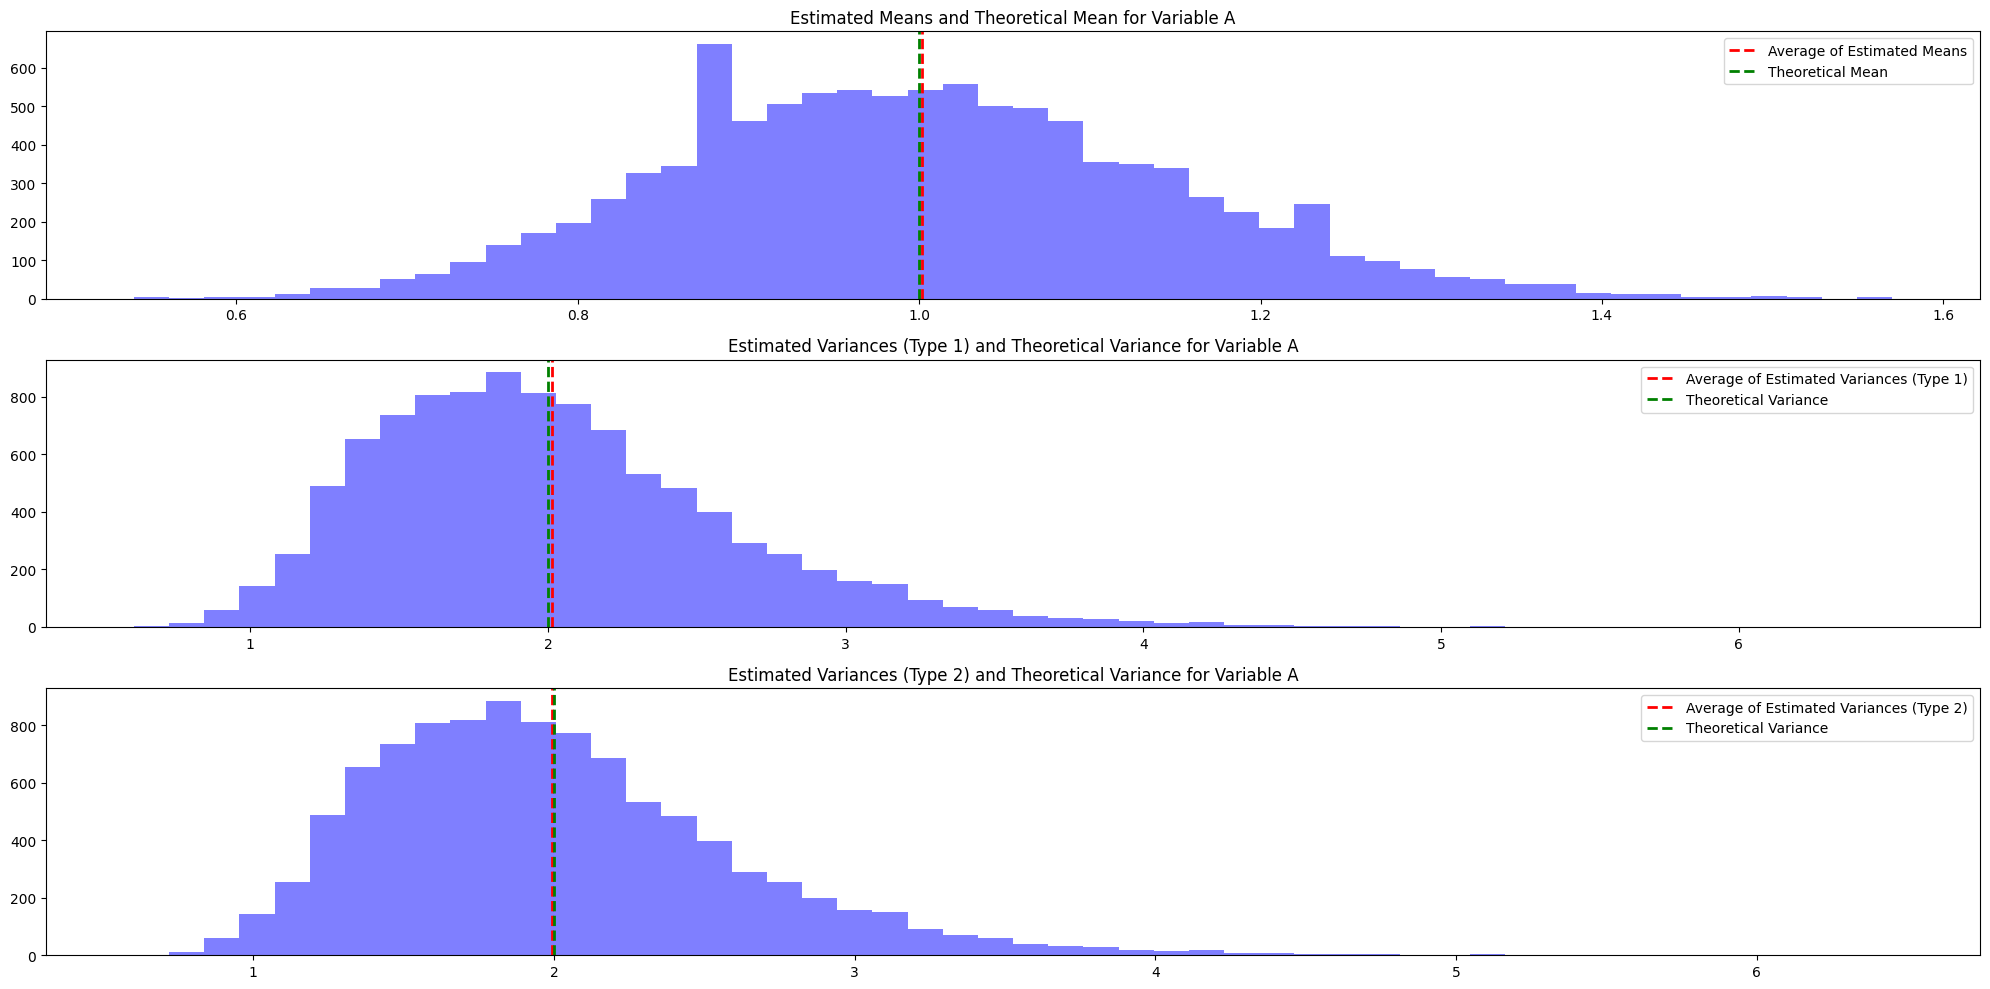

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Generate population
population_a = [generate_a() for _ in range(1000000)]

sample_size = 100
num_sampling = 10000
var_index = 0  
est_means, est_variances_1, est_variances_2 = descriptive_stats(population_a, sample_size, num_sampling, var_index)

theoretical_mean_a = 1 
theoretical_variance_a = 2

# a. Estimated means
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
plt.hist(est_means, bins=50, color='blue', alpha=0.5)
plt.axvline(np.mean(est_means), color='r', linestyle='dashed', linewidth=2, label='Average of Estimated Means')
plt.axvline(theoretical_mean_a, color='g', linestyle='dashed', linewidth=2, label='Theoretical Mean')
plt.legend()
plt.title('Estimated Means and Theoretical Mean for Variable A')

# b. Estimated variances (Type 1)
plt.subplot(3, 1, 2)
plt.hist(est_variances_1, bins=50, color='blue', alpha=0.5)
plt.axvline(np.mean(est_variances_1), color='r', linestyle='dashed', linewidth=2, label='Average of Estimated Variances (Type 1)')
plt.axvline(theoretical_variance_a, color='g', linestyle='dashed', linewidth=2, label='Theoretical Variance')
plt.legend()
plt.title('Estimated Variances (Type 1) and Theoretical Variance for Variable A')

# c. Estimated variances (Type 2)
plt.subplot(3, 1, 3)
plt.hist(est_variances_2, bins=50, color='blue', alpha=0.5)
plt.axvline(np.mean(est_variances_2), color='r', linestyle='dashed', linewidth=2, label='Average of Estimated Variances (Type 2)')
plt.axvline(theoretical_variance_a, color='g', linestyle='dashed', linewidth=2, label='Theoretical Variance')
plt.legend()
plt.title('Estimated Variances (Type 2) and Theoretical Variance for Variable A')

plt.tight_layout()
plt.show()



<span style="color:red">**9**</span>. Call the **descriptive_stats** function for variable A with the sample size as (100, 200, 300, …,5000) and the number of samples as 500. Compute the variances of the estimated means and the estimated variances of type 1 for each sample size and create the sample size v.s. variance plot for both of them in the same figure.

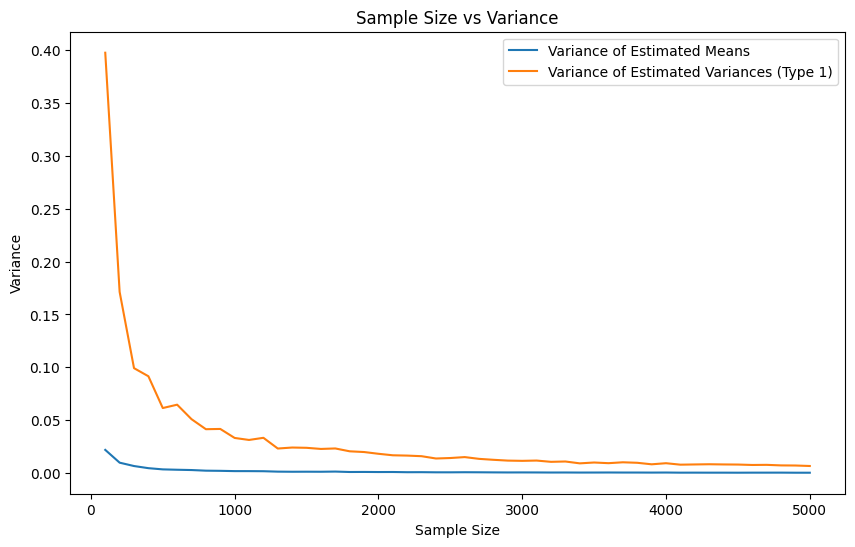

In [24]:
import numpy as np
import matplotlib.pyplot as plt


sample_sizes = np.arange(100, 5100, 100)
num_sampling = 500
var_index = 0 

population_size_a = 10000  
population_a = np.array([generate_a() for _ in range(population_size_a)])


variances_of_est_means = []
variances_of_est_variances_1 = []


for sample_size in sample_sizes:
    est_means, est_variances_1, _ = descriptive_stats(population_a, sample_size, num_sampling, var_index)
    variances_of_est_means.append(estimate_variance_2(est_means))
    variances_of_est_variances_1.append(estimate_variance_2(est_variances_1))

plt.figure(figsize=(10, 6))

plt.plot(sample_sizes, variances_of_est_means, label="Variance of Estimated Means")

plt.plot(sample_sizes, variances_of_est_variances_1, label="Variance of Estimated Variances (Type 1)")

plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.title('Sample Size vs Variance')
plt.legend()

plt.show()

### TASK 3: Parameter Estimation
<br>
<br>
Your third task is to estimate some of the distribution parameters using the Method of Moments and the Method of Maximum Likelihood.
<br>
<br>
Here are the detailed steps:

<span style="color:red">**2**</span>. Implement a function (**estimate_mml_d**) that takes a sample of D and returns the Method of Maximum Likelihood estimations for μ and σ. You can use previously implemented functions.

In [25]:
def estimate_mml_d(sample):
    mu = estimate_mean(sample)
    sigma = np.sqrt(estimate_variance_2(sample)) 
    return mu, sigma


<span style="color:red">**4**</span>. Implement a function (**estimate_mom_e**) that takes a sample of E and returns the Method of Moments estimations for i and j. You should use **sympy**’s solver to find j using the following code where you have to replace f(j) with your function expression:
```python
j = sympy.S('j')
sol = sympy.solve(f(j), j)
ind = 0
while True:
    j = float(sol[ind].as_real_imag()[0])
    ind += 1
    if j >= 0:
        break
```
After this point, you should be able to compute i using g(j).

In [26]:
"""More efficient algorithm(solves less than 10 second) for solving the equations(scipy), I used this functions in all the remaining parts 
    after I got the permission from T.A's  """
import numpy as np
import scipy.optimize as optimize

def estimate_mom_e(sample):
    sample_moment1 = estimate_mean(sample)
    sample_moment2 = sum(x**2 for x in sample) / len(sample)
    
    def equation_to_solve(j):
        i = sample_moment1 - (1/3) * ((2*(1+j)**(3/2)) - (2*(j)**(3/2)))
        population_moment2 = (4*((i)/3)) * ((j+1)**(3/2) - j**(3/2)) + (i**2) + j + (1/2)
        f_j = population_moment2 - sample_moment2
        return f_j
    
    #I Used the numerical solver from SciPy
    initial_guess = 0.0 
    sol = optimize.root(equation_to_solve, initial_guess)
    j = sol.x[0]
    i = sample_moment1 - (1/3) * ((2*(1+j)**(3/2)) - (2*(j)**(3/2)))
    
    return i, j



In [27]:
"""This code block solves the equations with using sympys solve function but running time of this code last more than 45minutes
    so it is not an efficient way to use this function 
    I just implemented the code below , same equation with sympys solve function but 
    I didn't use anywhere this function, I used the one above, as I early mentioned and got the permission from T.A's"""
import numpy as np
from sympy import symbols, solve

def estimate_mom_e2(sample):
    i, j = symbols('i j')
    sample_moment1 = estimate_mean(sample)
    sample_moment2 = sum(x**2 for x in sample) / len(sample)

    eq1 = sample_moment1 - (1/3) * ((2*(1+j)**(3/2)) - (2*(j)**(3/2)))
    population_moment2 = (4*((i)/3)) * ((j+1)**(3/2) - j**(3/2)) + (i**2) + j + (1/2)
    eq2 = population_moment2 - sample_moment2

    # I Used sympy's solve to solve the equations
    sol = solve((eq1, eq2), (i, j))

    i_value = np.float64(sol[i])
    j_value = np.float64(sol[j])

    return i_value, j_value


<span style="color:red">**6**</span>. Implement a function (**estimate_mml_h**) that takes a sample of H and returns the Method of Maximum Likelihood estimations for k.

In [28]:
def estimate_mml_h(sample):
    count = sum(1 for h in sample if 0 <= h < 1)
    k = count / len(sample)
    return k, 1 - k


<span style="color:red">**7**</span>. Implement a function (**parameter_estimation**) that takes a population, sample size (n), the number of sampling (m) and patient category as input. Using the previously implemented functions, it samples from <u>a subset of the population where the patient is in the given category</u> and returns lists of estimated parameters of variables D, E, and H.

In [29]:
def parameter_estimation(population, sample_size, num_sampling, c):
    d_mu_estimate = []
    d_sigma_estimate = []
    e_i_estimate = []
    e_j_estimate = []
    h_k_estimate = []
    h_l_estimate = []

    for _ in range(num_sampling):
        sample = random_sample(population, sample_size)
        specific_category_sample = [row for row in sample if row[2] == c]
        specific_category_sample = np.array(specific_category_sample)

        mu_value, sigma_value = estimate_mml_d(specific_category_sample[:, 3])
        i_value, j_value = estimate_mom_e(specific_category_sample[:, 4])
        k_value, l_value = estimate_mml_h(specific_category_sample[:, 5])

        d_mu_estimate.append(mu_value)
        d_sigma_estimate.append(sigma_value)
        e_i_estimate.append(i_value)
        e_j_estimate.append(j_value)
        h_k_estimate.append(k_value)
        h_l_estimate.append(l_value)

    return d_mu_estimate, d_sigma_estimate, e_i_estimate, e_j_estimate, h_k_estimate, h_l_estimate



<span style="color:red">**8**</span>. Call the parameter_estimation function for the “very risky” patient category with the sample size as 100 and the number of samples as 1000.
* a. In the same figure, plot the histogram of the estimated i parameter of E, a vertical line at the average of the estimations, and a vertical line at the actual i value.
* b. In the same figure, plot the histogram of the estimated j parameter of E, a vertical line at the average of the estimations, and a vertical line at the actual i value.
* c. In the same figure, plot the histogram of the estimated k parameter of H, a vertical line at the average of the estimations, and a vertical line at the actual i value.
* d. In the same figure, plot the histogram of the estimated i parameter of H, a vertical line at the average of the estimations, and a vertical line at the actual i value.

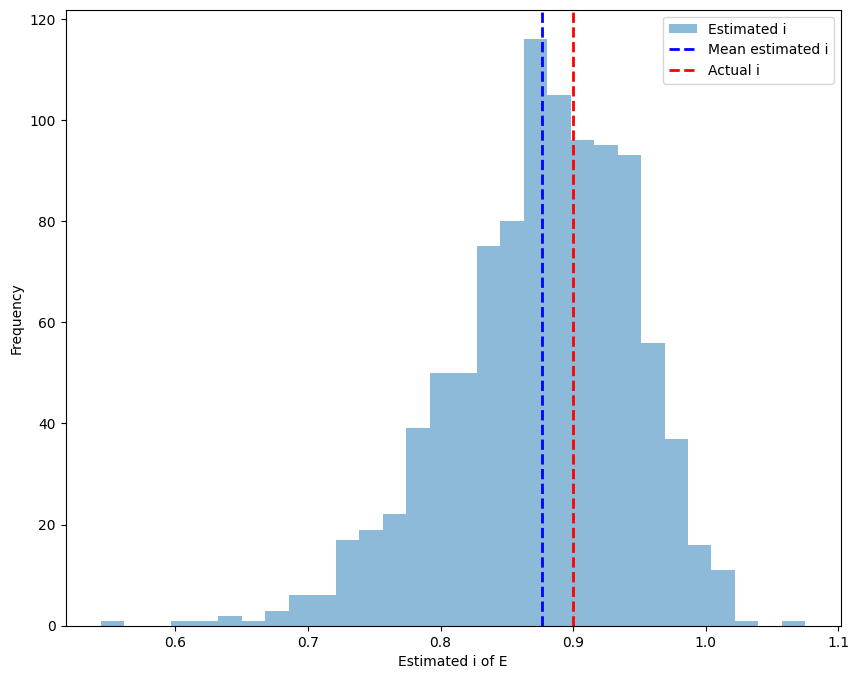

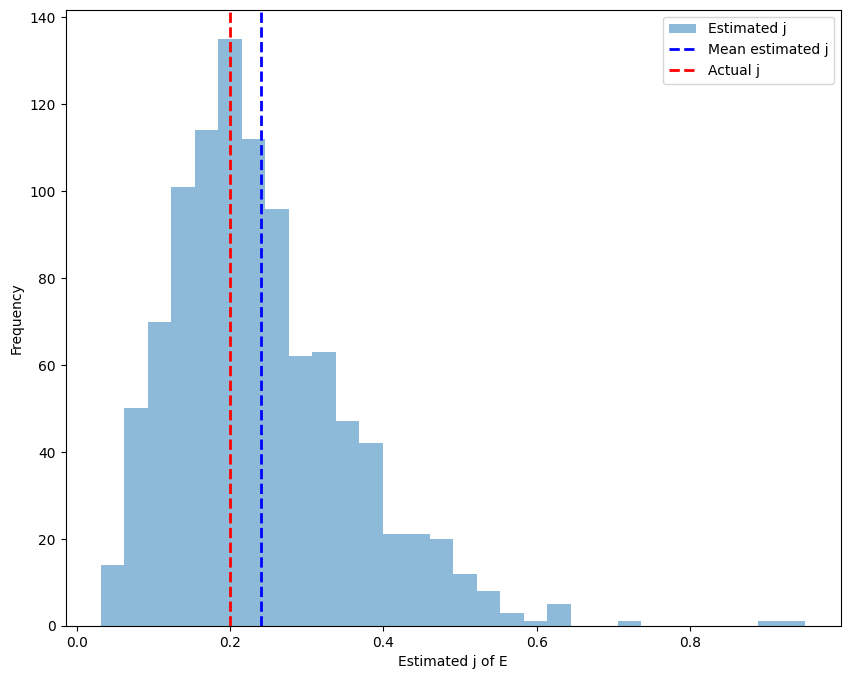

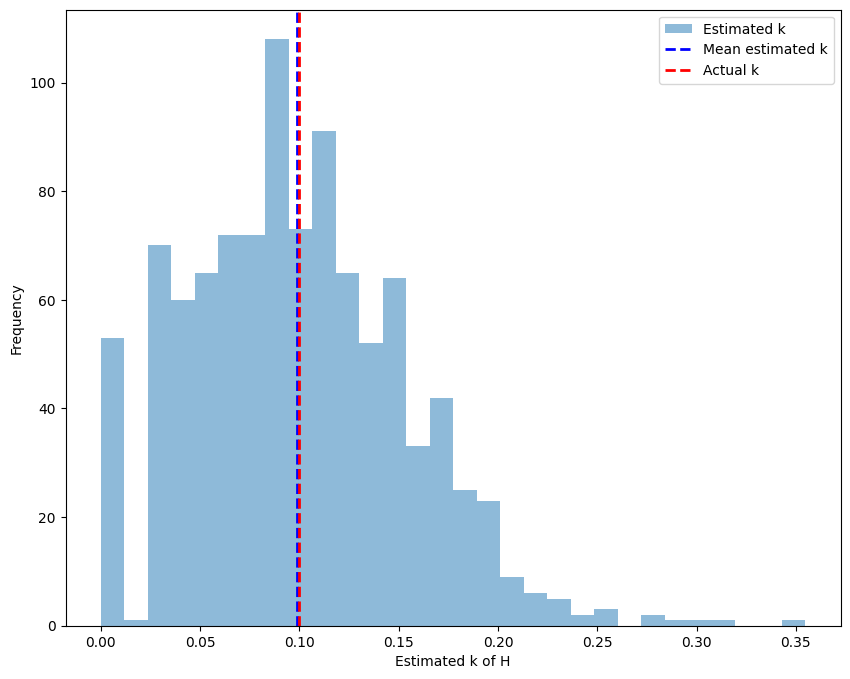

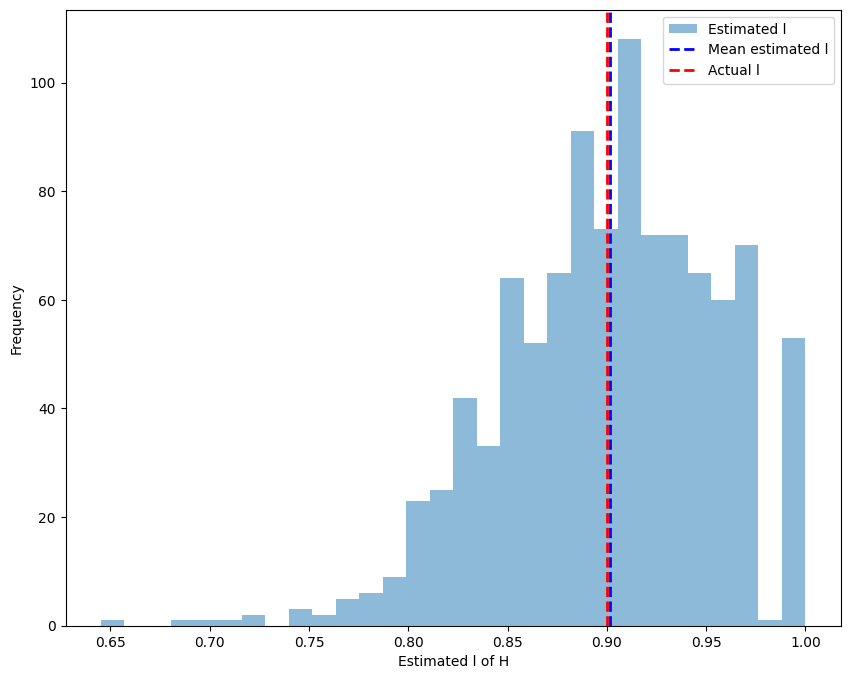

In [30]:
population = []

with open('population.txt', 'r') as file:
    for line in file:
        patient = [float(value) for value in line.split()]
        population.append(patient)

population = np.array(population)

est_dmu, est_dsigma, est_ei, est_ej, est_hk, est_hl = parameter_estimation(population, 100, 1000, 2.0)  # 2.0 represents "very risky"


actual_ei = 0.9  
actual_ej = 0.2  
actual_hk = 0.1  
actual_hl = 0.9  

# a. Plot histogram for estimated i parameter of E
plt.figure(figsize=(10,8))
plt.hist(est_ei, bins=30, alpha=0.5, label='Estimated i')
plt.axvline(np.mean(est_ei), color='b', linestyle='dashed', linewidth=2, label='Mean estimated i')
plt.axvline(actual_ei, color='r', linestyle='dashed', linewidth=2, label='Actual i')
plt.xlabel('Estimated i of E')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# b. Plot histogram for estimated j parameter of E
plt.figure(figsize=(10,8))
plt.hist(est_ej, bins=30, alpha=0.5, label='Estimated j')
plt.axvline(np.mean(est_ej), color='b', linestyle='dashed', linewidth=2, label='Mean estimated j')
plt.axvline(actual_ej, color='r', linestyle='dashed', linewidth=2, label='Actual j')
plt.xlabel('Estimated j of E')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# c. Plot histogram for estimated k parameter of H
plt.figure(figsize=(10,8))
plt.hist(est_hk, bins=30, alpha=0.5, label='Estimated k')
plt.axvline(np.mean(est_hk), color='b', linestyle='dashed', linewidth=2, label='Mean estimated k')
plt.axvline(actual_hk, color='r', linestyle='dashed', linewidth=2, label='Actual k')
plt.xlabel('Estimated k of H')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# d. Plot histogram for estimated l parameter of H
plt.figure(figsize=(10,8))
plt.hist(est_hl, bins=30, alpha=0.5, label='Estimated l')
plt.axvline(np.mean(est_hl), color='b', linestyle='dashed', linewidth=2, label='Mean estimated l')
plt.axvline(actual_hl, color='r', linestyle='dashed', linewidth=2, label='Actual l')
plt.xlabel('Estimated l of H')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### TASK 4: Confidence intervals
<br>
<br>
Your fourth task is to calculate confidence intervals for the population mean of variable A.
<br>
<br>
Here are the detailed steps:

<span style="color:red">**1**</span>. Implement a function (**calc_conf_int_mean**) that takes a population, sample size (n), variable index, population standard deviation for that variable, and the confidence level as input. Using a look-up dictionary for quantiles z<sub>0.1</sub>, z<sub>0.05</sub>, z<sub>0.025</sub>, z<sub>0.01</sub>, and z<sub>0.05</sub>, it computes and returns a confidence interval for the population mean of the requested variable.

In [31]:
def calc_conf_int_mean(sample, sample_size, pop_std, conf_lvl):
    z_scores = {
        0.80: 1.28,
        0.90: 1.645,
        0.95: 1.96,
        0.98: 2.33,
        0.99: 2.58
    }
    
    z = z_scores[conf_lvl]
    mean = estimate_mean(sample)

    margin_of_error = z * (pop_std / np.sqrt(sample_size))
    conf_int = (mean - margin_of_error, mean + margin_of_error)

    return conf_int


<span style="color:red">**2**</span>. For random variable A and sample size of 1000, compute the confidence intervals for 20 different samples for both confidence levels as 0.98 and 0.8, using the calc_conf_int_mean function.
* a. In the same figure, plot the computed confidence intervals for level 0.98, confidence intervals for level 0.8, and a vertical line at the actual population mean for A.

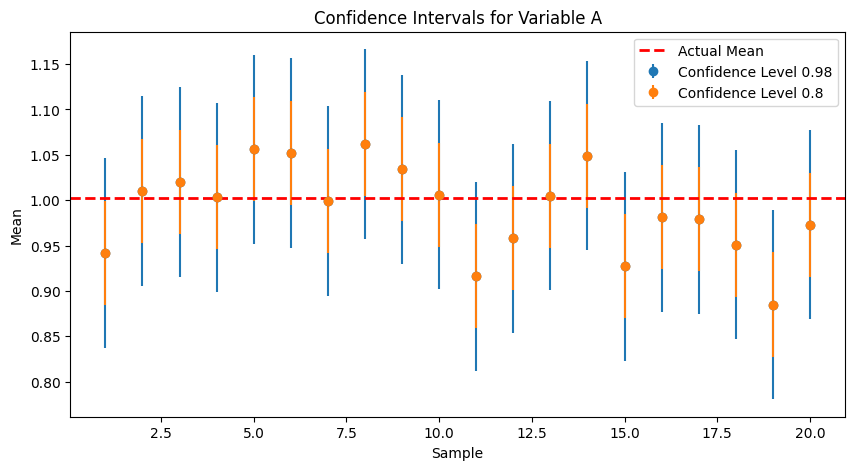

In [32]:
import matplotlib.pyplot as plt

pop_std_a = np.sqrt(estimate_variance_2(population[:, 0]))
sample_size = 1000
conf_ints_098 = []
conf_ints_08 = []

for _ in range(20):
    sample = np.random.choice(population[:, 0], size=sample_size)
    conf_int_098 = calc_conf_int_mean(sample, sample_size, pop_std_a, 0.98)
    conf_int_08 = calc_conf_int_mean(sample, sample_size, pop_std_a, 0.8)
    conf_ints_098.append(conf_int_098)
    conf_ints_08.append(conf_int_08)

pop_mean_a = estimate_mean(population[:, 0])


plt.figure(figsize=(10, 5))
plt.errorbar(range(1, 21), [estimate_mean(ci) for ci in conf_ints_098], yerr=[(ci[1]-ci[0])/2 for ci in conf_ints_098], fmt='o', label='Confidence Level 0.98')
plt.errorbar(range(1, 21), [estimate_mean(ci) for ci in conf_ints_08], yerr=[(ci[1]-ci[0])/2 for ci in conf_ints_08], fmt='o', label='Confidence Level 0.8')
plt.axhline(pop_mean_a, color='r', linestyle='dashed', linewidth=2, label='Actual Mean')

plt.title('Confidence Intervals for Variable A')
plt.xlabel('Sample')
plt.ylabel('Mean')
plt.legend()
plt.show()


<span style="color:red">**4**</span>. For random variable A and a confidence level of 0.9, compute the confidence intervals for the sample size of [ 100, 400, …, 4900] using the calc_conf_int_mean function.
* a. In the same figure, plot the computed confidence intervals with varying sample sizes and a vertical line at the actual population mean for A.

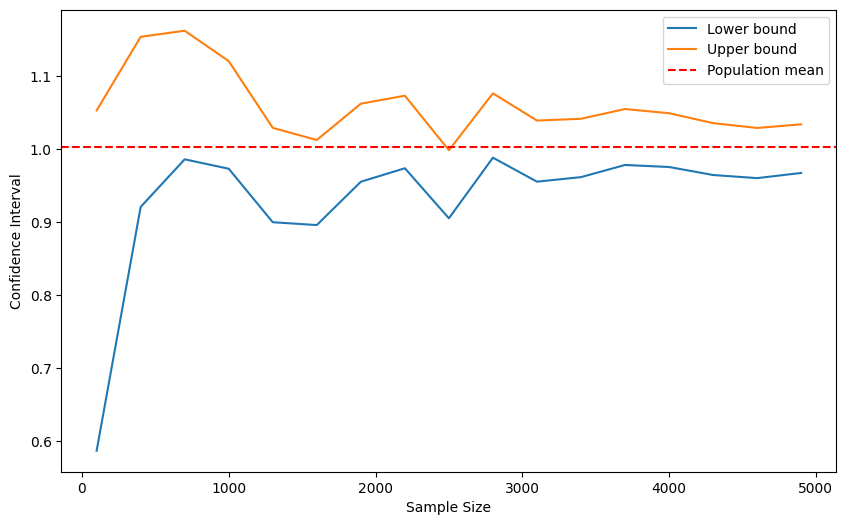

In [33]:
import numpy as np
import matplotlib.pyplot as plt

pop_mean_a = np.mean(population[:, 0])
pop_std_a = np.std(population[:, 0])

sample_sizes = np.arange(100, 5000, 300)
conf_lvl = 0.9

conf_ints_lower = []
conf_ints_upper = []

for sample_size in sample_sizes:
    indices = (np.random.random(size=sample_size) * len(population)).astype(int)
    sample = population[indices, 0]
    conf_int = calc_conf_int_mean(sample, sample_size, pop_std_a, conf_lvl)
    conf_ints_lower.append(conf_int[0])
    conf_ints_upper.append(conf_int[1])

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, conf_ints_lower, label='Lower bound')
plt.plot(sample_sizes, conf_ints_upper, label='Upper bound')
plt.axhline(pop_mean_a, color='red', linestyle='--', label='Population mean')
plt.xlabel('Sample Size')
plt.ylabel('Confidence Interval')
plt.legend()
plt.show()




### TASK 6: Naive Bayes classifier
<br>
<br>
Your last task is to apply and evaluate the Naive Bayes classifier for our population.
<br>
<br>
Here are the detailed steps:

<span style="color:red">**1**</span>. Implement a function (**estimate_parameters**) that takes a population sample, and using the previously implemented functions, it estimates and returns the category-conditioned probability distribution parameters of variables D, E, and H and prior category probabilities (3x2 for D and E, and 3 for C and H, in total 18 parameters).

In [34]:
def estimate_parameters(pop_sample):
    sample_data = [[], [], []]
    sample_counts = [0, 0, 0]

    for sample in pop_sample:
        risk_level = int(sample[3])
        sample_data[risk_level].append(sample)
        sample_counts[risk_level] += 1

    p_c = [count / len(pop_sample) for count in sample_counts]
    sample_data = [np.array(data) for data in sample_data]
    def estimate_parameters_for_all(func, index):
        return [func(data[:, index]) for data in sample_data]

    est_d = estimate_parameters_for_all(estimate_mml_d, 0)
    est_e = estimate_parameters_for_all(estimate_mom_e, 1)
    est_h = estimate_parameters_for_all(estimate_mml_h, 2)
   
    return est_d[0], est_d[1], est_d[2], est_e[0], est_e[1], est_e[2], est_h[0], est_h[1], est_h[2], p_c[0], p_c[1], p_c[2]




<span style="color:red">**3**</span>. Implement a function (**calc_posterior**) that takes the cholesterol level (d), systolic blood pressure (e), and Hemoglobin A1c (HbA1c) level (h) of a patient and the distribution parameters estimated using the estimate_parameters function. Using the Bayes Rule, it computes and returns patient category (C) probabilities.

In [35]:
def calc_posterior(d, e, h, params):
    est_d0, est_d1, est_d2, est_e0, est_e1, est_e2, est_h0, est_h1, est_h2, p_c0, p_c1, p_c2 = params
    #Likelihoods
    L0 = pdf_d(d, est_d0[0], est_d0[1]) * pdf_e(e, est_e0[0], est_e0[1]) * pdf_h(h, est_h0[0], est_h0[1])  
    L1 = pdf_d(d, est_d1[0], est_d1[1]) * pdf_e(e, est_e1[0], est_e1[1]) * pdf_h(h, est_h1[0], est_h1[1])  
    L2 = pdf_d(d, est_d2[0], est_d2[1]) * pdf_e(e, est_e2[0], est_e2[1]) * pdf_h(h, est_h2[0], est_h2[1])  
    #Probabilities
    P0 = L0 * p_c0
    P1 = L1 * p_c1
    P2 = L2 * p_c2
    
    norm = P0 + P1 + P2    
    if(norm != 0):
        P0 /= norm
        P1 /= norm
        P2 /= norm

    return P0,P1,P2



<span style="color:red">**4**</span>. Create a sample of size 10000 for training. Training means that the patient categories are known (labeled) and will be used for estimating the category-conditioned probability distribution parameters.

In [36]:
training_sample_size = 10000
training_sample = []

while len(training_sample) < training_sample_size:
    a = generate_a()
    b = generate_b()
    c = calculate_c(a, b)
    d = generate_d(c)
    e = generate_e(c)
    h = generate_h(c)
    if c == 'risky':
        c_num = 1
    elif c == 'not risky':
        c_num = 0
    elif c == 'very risky':
        c_num = 2
    training_sample.append([d, e, h, c_num])

training_sample = np.array(training_sample)


<span style="color:red">**5**</span>. Create a sample size of 1000 for testing. Testing means that the patient categories are to be predicted. They will be determined as the category with the maximum posterior probability.

In [37]:
test_sample_size = 1000
test_sample = []
for _ in range(test_sample_size):
    a = generate_a()
    b = generate_b()
    c = calculate_c(a, b)
    d = generate_d(c)
    e = generate_e(c)
    h = generate_h(c)

    test_sample.append([a, b, c, d, e, h])

test_sample = np.array(test_sample)



<span style="color:red">**6**</span>. Using the training sample, compute the category-conditioned probability distribution parameters.

In [38]:
params = estimate_parameters(training_sample)

<span style="color:red">**7**</span>. For each patient in the test sample, compute the posterior probability for each category using the corresponding d, e, and h values and the previously estimated distribution parameters. Determine the category of the patient as the one with the highest posterior probability. Compare the estimated and the actual categories to check if the classification was correct. In 1000 tests, compute and print the ratio of the correctly classified patients.

In [39]:
category_to_int = {'very risky': 2, 'risky': 1, 'not risky': 0}
params = estimate_parameters(training_sample)
num_correct = 0

for patient in test_sample:
    a, b, true_c, d, e, h = patient
    true_c = category_to_int[true_c] 
    
    P0, P1, P2 = calc_posterior(d, e, h, params)
    probs = [P0, P1, P2]

    # Finding index of maximum probability
    max_prob_index = 0
    for i in range(len(probs)):
        if probs[i] > probs[max_prob_index]:
            max_prob_index = i

    predicted_c_val = max_prob_index  # taking the index of maximum probability to compare the patient true_category

    if true_c == predicted_c_val:
        num_correct += 1

ratio = num_correct / len(test_sample) * 100

print(f"The ratio of the correctly classified patients is {ratio}%.")


The ratio of the correctly classified patients is 80.80000000000001%.
